<a href="https://colab.research.google.com/github/mkayanda/Personal_Projects/blob/master/UNGeneralDebate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UN General Debate Dataset

The corpus consists of 7,507 speeches held at the annual sessions of the United Nations General Assembly from 1970 to 2016. It was created in 2017 by Mikhaylov, Baturo, and Dasandi at Harvard “for understanding and measuring state preferences in world politics.” Each of the almost 200 countries in the United Nations has the opportunity to present its views on global topics such international conflicts, terrorism, or climate change at the annual General Debate.

In [106]:
import sys, os
ON_COLAB = 'google.colab' in sys.modules

if ON_COLAB:
    GIT_ROOT = 'https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master'
    os.system(f'wget {GIT_ROOT}/ch01/setup.py')

%run -i setup.py

You are working on Google Colab.
Files will be downloaded to "/content".
!wget -P /content https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/settings.py
!wget -P /content/data/un-general-debates https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/data/un-general-debates/un-general-debates-blueprint.csv.gz
!wget -P /content/ch01 https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/ch01/requirements.txt

Additional setup ...
!pip install -r ch01/requirements.txt


<Figure size 800x400 with 0 Axes>

In [107]:
%run "$BASE_DIR/settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

In [108]:
pd.options.display.max_colwidth = 150 ###
file = "un-general-debates-blueprint.csv"
file = f"{BASE_DIR}/data/un-general-debates/un-general-debates-blueprint.csv.gz" ### real location
df = pd.read_csv(file)
df.sample(2, random_state=53)

,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to you and to this Assembly the greetings\nand congratulations of the Peruvian people, as well as\ntheir..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, Sir, on your assumption of\nthe presidency of the fifty-sixth session of the General\nAssembly.\nThi..."


In [109]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [110]:
df['length'] = df['text'].str.len()

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.00,49.61,12.89,25.00,39.00,51.00,61.00,70.00
year,7507.00,1994.61,12.89,1970.00,1984.00,1996.00,2006.00,2015.00
length,7507.00,17967.28,7860.04,2362.00,12077.00,16424.00,22479.50,72041.00


In [112]:
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,TUR,46
speaker,7480,5428,Seyoum Mesfin,12


In [113]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [114]:
df['speaker'].fillna('unknown', inplace=True)

In [115]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Mr. George W Bush     1
George Bush           1
Bush                  1
Name: speaker, dtype: int64

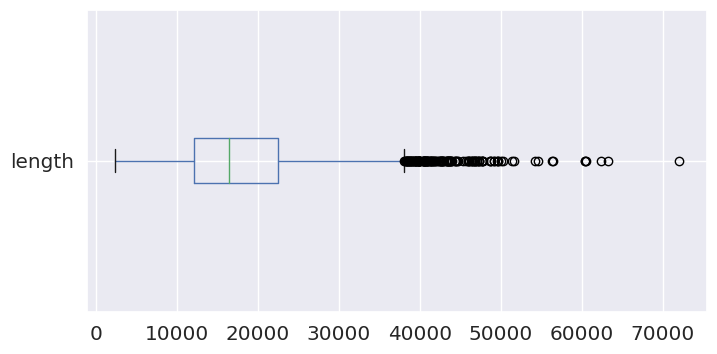

In [116]:
df['length'].plot(kind='box', vert=False)

 50% percent of the speeches (the box in the middle) have a length between roughly 12,000 and 22,000 characters, with the median at about 16,000 and a long tail with many outliers to the right. The distribution is obviously left-skewed. We can get some more details by plotting a histogram

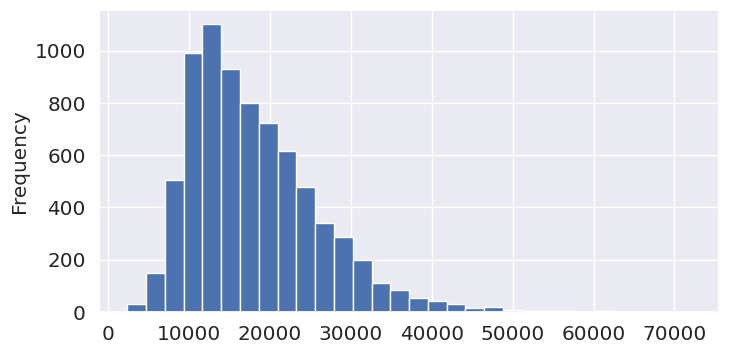

In [117]:
df.length.plot(kind='hist', bins=30)

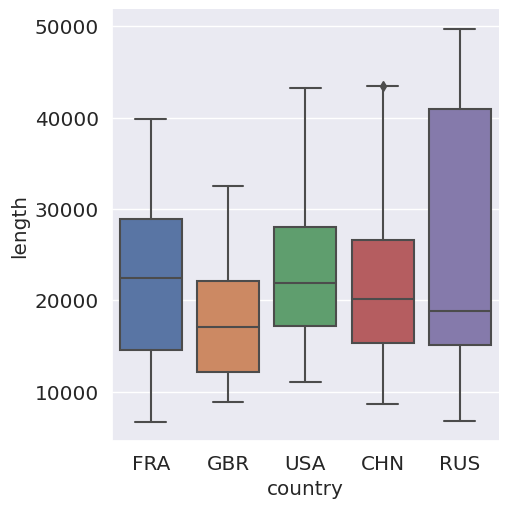

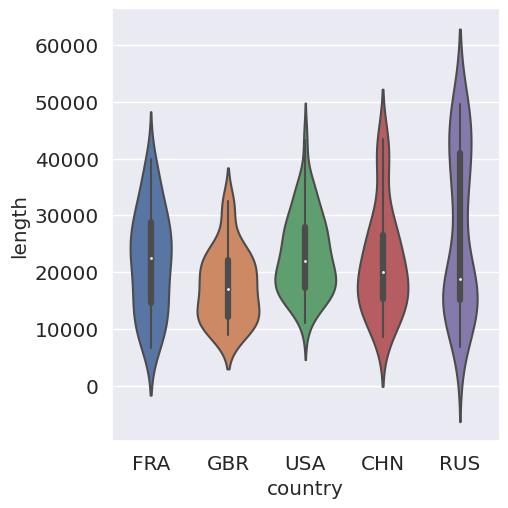

In [118]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x="country", y="length", kind='box')
sns.catplot(data=df[where], x="country", y="length", kind='violin')

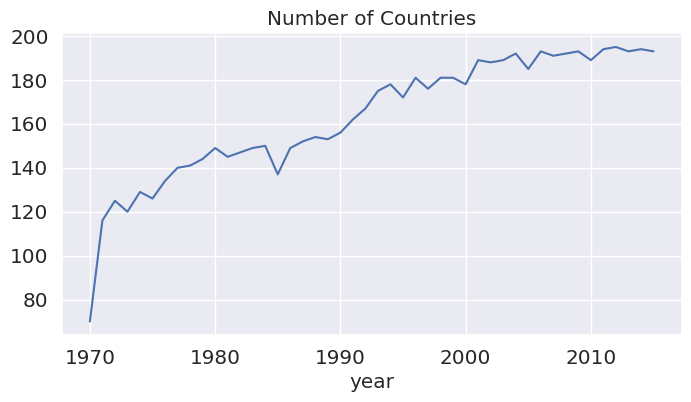

In [119]:
df.groupby('year').size().plot(title="Number of Countries")

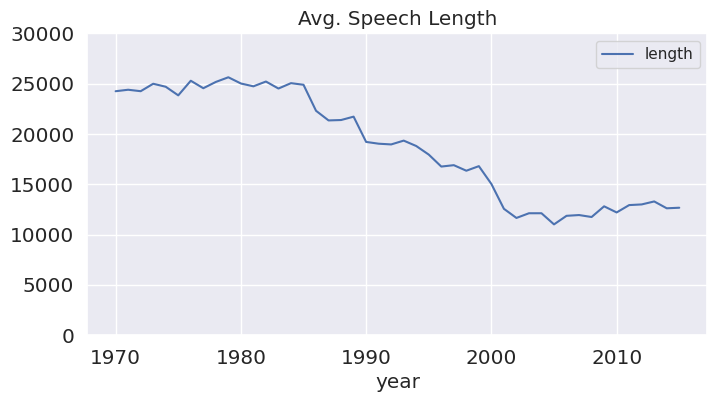

In [120]:
df.groupby('year').agg({'length': 'mean'}) \
  .plot(title="Avg. Speech Length", ylim=(0,30000))

In [121]:
## Blueprint: Building a Simple Text Preprocessing Pipeline¶


In [122]:
import regex as re

def tokenize(text):
  return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [123]:
# trying out the function

text = "Let's defeat SARS-CoV-2 together in 2020!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-CoV-2|together|in


In [124]:
# Treating stop words

import nltk
nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [125]:
# converting tokens to lowercase 

def remove_stop(tokens):
  return [t for t in tokens if t.lower() not in stopwords]

In [126]:
#Add and exclude stopwords from nltks predifinied list

include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

In [127]:
## Processing a Pipeline with One Line of Code (change all text to lowercase, tokenize it, and remove stop words)

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [128]:
#using the function on column text to create new column tokens
df['tokens'] = df['text'].progress_apply(prepare, pipeline=pipeline)

In [129]:
df['tokens'].head()

0    [may, first, convey, president, congratulations, albanian, delegation, election, presidency, twenty-fifth, session, general, assembly, taking, wor...
1    [fortunate, coincidence, precisely, time, united, nations, celebrating, first, twenty-five, years, existence, eminent, jurist, closely, linked, or...
2    [pleasure, extend, mr, president, warmest, congratulations, australia, government, delegation, general, assembly, election, presidency, distinguis...
3    [may, begin, expressing, ambassador, hambro, behalf, delegation, austria, best, wishes, election, president, general, assembly, derive, great, sat...
4    [doubt, us, coming, rostrum, wonders, usefulness, futility, speech, still, speak, voices, drowned, mournful, cries, many, victims, world, disorder...
Name: tokens, dtype: object

In [130]:
# adding column to summarize length of tokens column
df['num_tokens'] = df['tokens'].progress_map(len)

In [131]:
df['num_tokens'].head()

0    4125
1    2327
2    2545
3    2135
4    2025
Name: num_tokens, dtype: int64

## Blueprints for Word Frequency Analysis

In [132]:
# Counting words with a counter (a python built in class standard library)

from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

counter = Counter(tokens)
print(counter)

# The resulting counter is basically a dictionary object containing those items as keys and their frequencies as values.

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [133]:
#counter can be incrementally updated 
more_tokens = tokenize("She likes dogs and cats.")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [134]:
counter = Counter()

_ = df['tokens'].progress_map(counter.update)


In [135]:
pp.pprint(counter.most_common(5))

[('nations', 124508),
 ('united', 120763),
 ('international', 117223),
 ('world', 89421),
 ('countries', 85734)]


In [136]:
#from collections import Counter ###


def count_words(df, column='tokens', preprocess=None, min_freq=2):

  '''The function takes, as a first parameter, a Pandas DataFrame
   and takes the column name containing the tokens or the text as a second parameter.
   The last parameter of count_words defines a minimum frequency of tokens to be 
   included in the result. Its default is set to 2 to cut down the long tail of hapaxes, 
   i.e., tokens occurring only once.'''

    # process tokens and update counter
  def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
  counter = Counter()
  df[column].progress_map(update)

    # transform counter into data frame
  freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
  freq_df = freq_df.query('freq >= @min_freq')
  freq_df.index.name = 'token'
    
  return freq_df.sort_values('freq', ascending=False)

In [137]:
freq_df = count_words(df)
freq_df.head(5)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [138]:
# top words with 10+ characters
count_words(df, column='text', 
            preprocess=lambda text: re.findall(r"\w{10,}", text)).head(5)

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177


In [1]:
# we can visualize the above in a plot

ax = freq_df.head(15).plot(kind='barh', width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

NameError: ignored

## Blueprint: Creating Word Clouds

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]

wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [85]:
# for a large set of documents 

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400,
                   background_color= "black", colormap="Paired",
                   max_font_size=150, max_words=max_words)

    # convert DataFrame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items()
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)

    plt.title(title)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

In [ ]:
#this skips the top n words 
freq_2015_df = count_words(df[df['year']==2015])
plt.figure()
wordcloud(freq_2015_df['freq'], max_words=100)


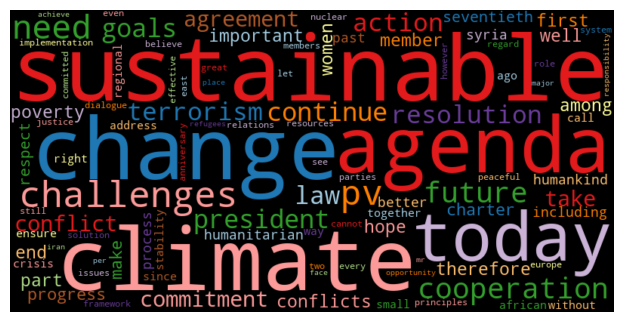

In [86]:
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)

## Blueprint: Ranking with TF-IDF

In [ ]:
def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # count tokens
    counter = Counter()
    df[column].map(update)

    # create DataFrame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df

In [87]:
idf_df = compute_idf(df)

In [ ]:
# sample of IDF values
# high IDF means rare (interesting) term
idf_df.sample(5)

In [88]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

In [89]:
# for more data: joining is faster
freq_df = freq_df.join(idf_df)
freq_df['tfidf'] = freq_df['freq'] * freq_df['idf']

In [90]:
freq_df['tfidf']

token
nations         12649.99
united          12285.61
international   12364.28
world            9503.71
countries       10888.49
                  ...   
unrewarding        16.66
israel-egypt       16.66
non-jews           16.66
shouf              16.66
al-baydhah           nan
Name: tfidf, Length: 40508, dtype: float64

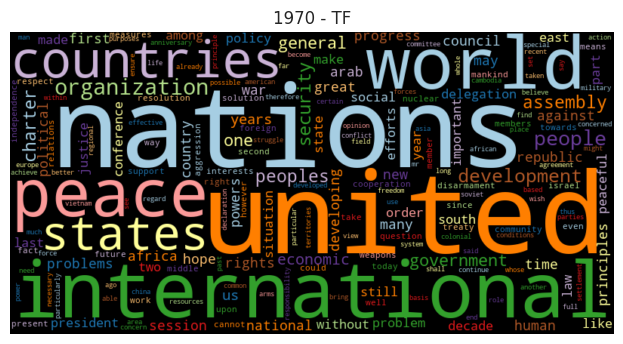

In [91]:
freq_1970 = count_words(df[df['year'] == 1970])
freq_2015 = count_words(df[df['year'] == 2015])

freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']

#wordcloud(freq_df['freq'], title='All years', subplot=(1,3,1))
wordcloud(freq_1970['freq'], title='1970 - TF',
          stopwords=['twenty-fifth', 'twenty-five'])


In [ ]:
wordcloud(freq_2015['freq'], title='2015 - TF',
          stopwords=['seventieth'])


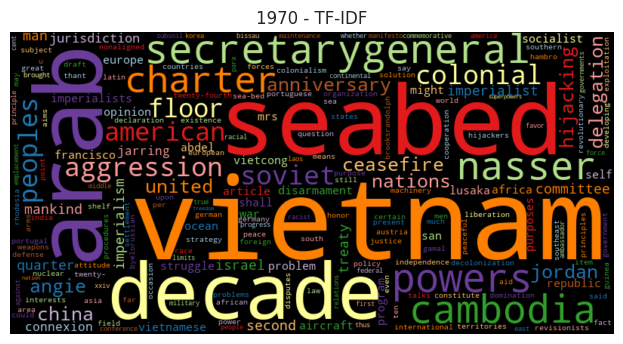

In [92]:
wordcloud(freq_1970['tfidf'], title='1970 - TF-IDF',
          stopwords=['twenty-fifth', 'twenty-five', 'twenty', 'fifth'])


In [ ]:
wordcloud(freq_2015['tfidf'], title='2015 - TF-IDF',
          stopwords=['seventieth'])

## Blueprint: Finding a Keyword-in-Context

In [93]:
!pip install textacy

In [ ]:
from textacy.text_utils import KWIC

def kwic(doc_series, keyword, window=35, print_samples=5):

    def add_kwic(text):
        kwic_list.extend(KWIC(text, keyword, ignore_case=True, 
                              window_width=window, print_only=False))

    kwic_list = []
    doc_series.progress_map(add_kwic)

    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ \
                  sample[1]+'  '+\
                  re.sub(r'[\n\t]', ' ', sample[2]))

In [ ]:
kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

## Blueprint: Analyzing N-Grams


In [94]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]



In [ ]:
# test if its working
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens, 2)))

In [95]:
#we create the bigrams on all tokens but keep only those that do not contain any stop words with this modified ngrams function 

def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
            if len([t for t in ngram if t in stopwords])==0]

print("Bigrams:", "|".join(ngrams(tokens, 2, stopwords=stopwords)))
print("Trigrams:", "|".join(ngrams(tokens, 3, stopwords=stopwords)))

Bigrams: She likes|cats like
Trigrams: 


In [96]:
#adding a column containing all bigrams 
df['bigrams'] = df['text'].apply(prepare, pipeline=[str.lower, tokenize]) \
                          .apply(ngrams, n=2, stopwords=stopwords)

count_words(df, 'bigrams').head(5)

,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856


In [97]:
idf_df = compute_idf(df) ### re-initialize to be safe
# concatenate existing IDF data frame with bigram IDFs
idf_df = pd.concat([idf_df, compute_idf(df, 'bigrams', min_df=10)])

freq_df = count_words(df[df['year'] == 2015], 'bigrams')
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

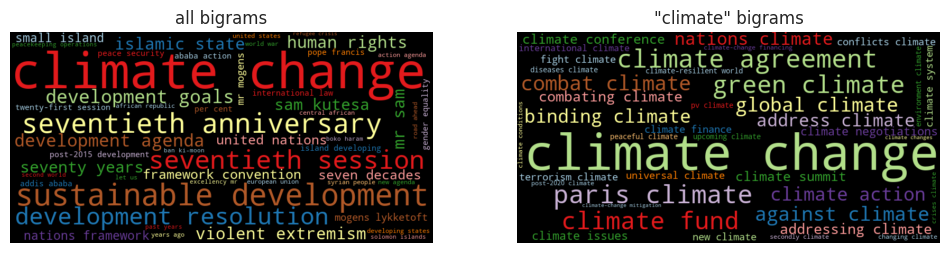

In [98]:
plt.figure(figsize=(12,6)) ###
plt.subplot(1,2,1) ###
wordcloud(freq_df['tfidf'], title='all bigrams', max_words=50)

plt.subplot(1,2,2) ###
# plt.tight_layout() ###
where = freq_df.index.str.contains('climate')
wordcloud(freq_df[where]['freq'], title='"climate" bigrams', max_words=50)

Blueprint: Comparing Frequencies Across Time Intervals and Categories

In [99]:
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [100]:
#check with an example 
keywords = ['nuclear', 'terrorism', 'climate', 'freedom']
tokens = ['nuclear', 'climate', 'climate', 'freedom', 'climate', 'freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


In [101]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].progress_apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

In [102]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

In [103]:
freq_df

,nuclear,terrorism,climate,freedom
year,,,,
1970,192,7,18,128
1971,275,9,35,205
1972,393,379,74,280
1973,347,124,79,266
1974,478,24,71,316
1975,578,20,53,232
1976,451,146,57,347
1977,675,75,58,321
1978,550,82,52,309


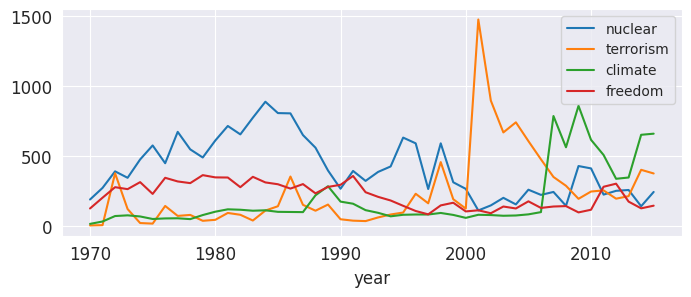

In [104]:
freq_df.plot(kind='line', figsize=(8, 3))

##Creating Frequency Heatmaps

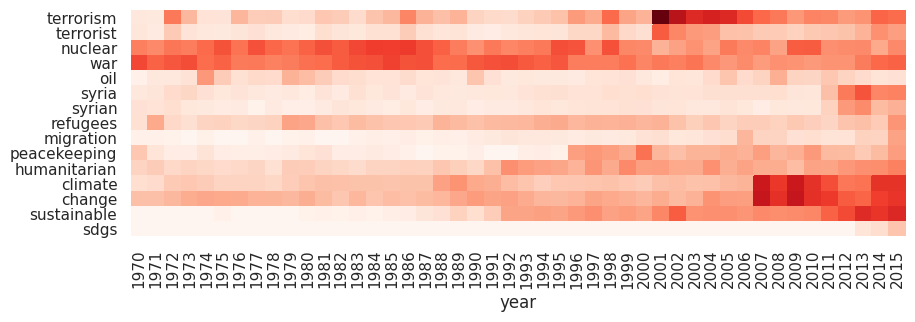

In [105]:
keywords = ['terrorism', 'terrorist', 'nuclear', 'war', 'oil',
            'syria', 'syrian', 'refugees', 'migration', 'peacekeeping', 
            'humanitarian', 'climate', 'change', 'sustainable', 'sdgs']  

freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

plt.figure(figsize=(10, 3)) ###
sns.set(font_scale=1) ###
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1) ###